Likes Model MSE: 6.296025102313731e-26
Time Model MSE: 6.150156832329314e-29


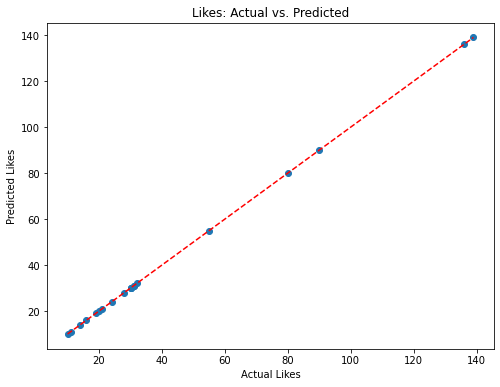

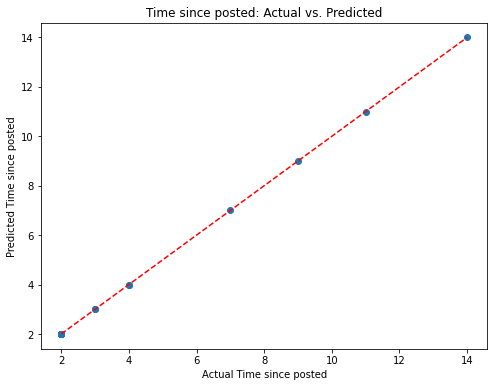

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

try:
    df = pd.read_csv("instagram_reach.csv")
except Exception as e:
    print("Error occurred while loading the dataset:", str(e))
    exit()

# Convert 'Time since posted' column to numeric values
try:
    df['Time since posted'] = df['Time since posted'].str.extract('(\d+)').astype(float)
except Exception as e:
    print("Error occurred while converting 'Time since posted' column:", str(e))
    exit()

# Prepare input and target variables
try:
    X = df.drop(['USERNAME', 'Caption', 'Hashtags'], axis=1)
    y_likes = df['Likes']
    y_time_since_posted = df['Time since posted']
except KeyError as e:
    print("Error occurred while preparing input and target variables:", str(e))
    exit()

# Split the dataset into training and testing sets
try:
    X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(
        X, y_likes, y_time_since_posted, test_size=0.2, random_state=42
    )
except Exception as e:
    print("Error occurred while splitting the dataset:", str(e))
    exit()

# Initialize and train the linear regression models
likes_model = LinearRegression()
time_model = LinearRegression()

try:
    likes_model.fit(X_train, y_likes_train)
    time_model.fit(X_train, y_time_train)
except Exception as e:
    print("Error occurred while training the models:", str(e))
    exit()

# Make predictions on the test set
try:
    likes_predictions = likes_model.predict(X_test)
    time_predictions = time_model.predict(X_test)
except Exception as e:
    print("Error occurred while making predictions:", str(e))
    exit()

# Evaluate the models
try:
    likes_mse = mean_squared_error(y_likes_test, likes_predictions)
    time_mse = mean_squared_error(y_time_test, time_predictions)
except Exception as e:
    print("Error occurred while evaluating the models:", str(e))
    exit()

# Print the evaluation results
print("Likes Model MSE:", likes_mse)
print("Time Model MSE:", time_mse)

# Plotting Likes prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_likes_test, likes_predictions)
plt.plot([min(y_likes_test), max(y_likes_test)], [min(y_likes_test), max(y_likes_test)], color='red', linestyle='--')
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Likes: Actual vs. Predicted')
plt.show()

# Plotting Time since posted prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_time_test, time_predictions)
plt.plot([min(y_time_test), max(y_time_test)], [min(y_time_test), max(y_time_test)], color='red', linestyle='--')
plt.xlabel('Actual Time since posted')
plt.ylabel('Predicted Time since posted')
plt.title('Time since posted: Actual vs. Predicted')
plt.show()